# To import the main libraries

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import random # to print the image in random
from numpy import genfromtxt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

# To load the Datasets

In [3]:
x_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')
x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [4]:
print("shape of xtrain" , x_test.shape)

shape of xtrain (400, 30000)


# To change the shape of the images

In [5]:
x_train=x_train.reshape(len(x_train), 100,100,3)   # to reshape the images  in training sets and test sets(Optional)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test), 100,100,3)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255.0  # to scale (Normalize) the pixel values from ( 1 to 0 )
x_test=x_test/255.0

In [6]:
print("shape of xtrain" , x_train.shape)

shape of xtrain (2000, 100, 100, 3)


In [7]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

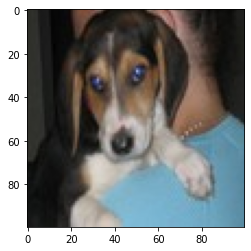

In [9]:
idx = random.randint(0 , len(x_train)) 
plt.imshow(x_train[idx , :])
plt.show()

In [10]:
print("shape of xtrain :" , x_train.shape)  # to get the shape of xtrain images
print("shape of ytrain :" , y_train.shape)   #to get the shape of ytrain images
print("shape of xtest :" , x_test.shape)     #to get the shape of xtest images
print("shape of ytest :" , y_test.shape)    #to get the shape of ytest images

shape of xtrain : (2000, 100, 100, 3)
shape of ytrain : (2000, 1)
shape of xtest : (400, 100, 100, 3)
shape of ytest : (400, 1)


# to build the neural network

In [11]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [12]:
model.compile(loss ='binary_crossentropy',optimizer = 'adam' , metrics =['accuracy'])  # to add the main parameters

In [21]:
model.fit(x_train , y_train ,epochs = 10 , batch_size = 64)   # to start initate the training

Train on 2000 samples
Epoch 1/10
2000/2000 [==============================] - 12s 6ms/sample - loss: 0.1957 - accuracy: 0.9320
Epoch 2/10
2000/2000 [==============================] - 12s 6ms/sample - loss: 0.1511 - accuracy: 0.9500
Epoch 3/10
2000/2000 [==============================] - 12s 6ms/sample - loss: 0.1231 - accuracy: 0.9625
Epoch 4/10
2000/2000 [==============================] - 13s 6ms/sample - loss: 0.1017 - accuracy: 0.9750
Epoch 5/10
2000/2000 [==============================] - 16s 8ms/sample - loss: 0.0663 - accuracy: 0.9830
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/sample - loss: 0.0443 - accuracy: 0.9930
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/sample - loss: 0.0307 - accuracy: 0.9960
Epoch 8/10
2000/2000 [==============================] - 17s 9ms/sample - loss: 0.0247 - accuracy: 0.9975
Epoch 9/10
2000/2000 [==============================] - 16s 8ms/sample - loss: 0.0163 - accuracy: 0.9995
Epoch 10/10
2000/2000 [==========

In [20]:
model.evaluate(x_test , y_test )  # to train the xtest and ytest data and evalute

400/400 [==============================] - 1s 2ms/sample - loss: 0.7200 - accuracy: 0.6775


[0.7199991917610169, 0.6775]

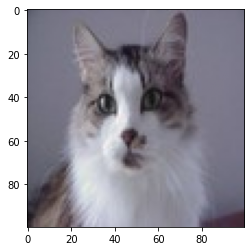

Our Model says its a : cat


In [18]:
idx2 = random.randint(0, len(y_test)) 
plt.imshow(x_test[idx2, :])
plt.show()
y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5  # if the value less that 0 its a dog otherwise cat

if ( y_pred == 0 ):
    
      pred = 'dog'
    
else: 
        
    pred='cat'
    

print("Our Model says its a :" , pred ) 
        
